# Logistic Regression

Logistic regression, regardless of the name, is a *classification* algorithm and has not much to do with regression. 

The difference compared with vanilla regression is that, we wrap a sigmoid/logistic function around the hypothesis output from linear regression. This resulting hypothesis function maps the input to a real number between 0 and 1. This value represents the probability that the output is 1. As we are dealing with discrete output values here, in binary logistic regression values greater than 0.5 are taken to belong to label 1 and below 0.5 to label 0. $g(z)$ is our sigmoid function:

\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}

Cost function is also different here. The cost function from linear regression could not be used as it wouldn't have been convex (i.e. ups and downs and no convergence to a single limit point). In its vectorized form, the total cost across the dataset would be computed by:

$$\begin{align*} & h = g(X\theta)\newline & J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}$$

Gradient descent algorithm ends up being similar to before, with this vectorized representation:

$$\theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y})$$

Note: "Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, faster ways to optimize θ that could be used instead of gradient descent.

In the first exercise we are supposed to build a logistic regression model to predict whether a student gets admitted into a university. 'ex2data1.txt' contains the training set. Each row consists of the applicant’s scores on two exams and the admissions decision (0 or 1). Let's first visalize this:

In [248]:
# Logistic Regression 
%matplotlib inline
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Suppressing warnings 
# import warnings
# warnings.filterwarnings('ignore')

data = pd.read_csv("ex2data1.txt", header=None, names=['Exam 1', 'Exam 2', 'Result']) 
data.head()

,Exam 1,Exam 2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [249]:
# splitting the dataset based on the result 

# We use DataFrame.isin() that returns a boolen value based on whether members of our data frame can be found 
# in a specified list.

# Example from Pandas docs:

# >>> import pandas as pd
# >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'f']})
# >>> df
#    A  B
# 0  1  a
# 1  2  b
# 2  3  f
# >>> df.isin([1, 3, 12, 'a'])
#        A      B
# 0   True   True
# 1  False  False
# 2   True  False
# >>> 

# The output is a boolean series that could be passed to the data frame again. Only those indices that are True will 
# return values corresponding to their position. For example, in the first example we would have:
# >>> df[pd.Series([True, False, True])]
#    A  B
# 0  1  a
# 2  3  f

passed = data[data['Result'].isin([1])]  
failed = data[data['Result'].isin([0])]  

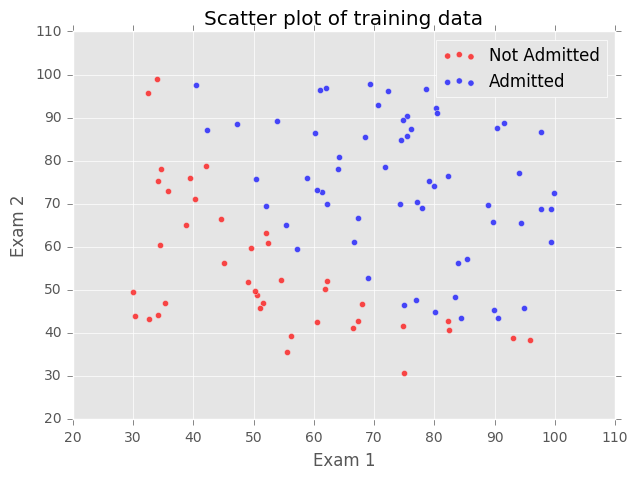

In [250]:
ax = failed.plot(kind='scatter', x='Exam 1', y='Exam 2', marker= 'o', 
      alpha = 0.7, color= 'r', figsize=(7,5), label='Not Admitted', title='Scatter plot of training data')
passed.plot(kind='scatter', x='Exam 1', y='Exam 2', marker= 'o', 
      alpha = 0.7, color= 'b', figsize=(7,5), ax=ax, label='Admitted')

As a warm-up exercise, we have to first implement $h_\theta (x)$. It is uses the logistic function
aka the sigmoid function ($g(z)$ mentioned above). $g(z)$ has a simple formula, however here we can use a vectorized built-in version from scipy:

sigmoid(0) = 0.5, sigmoid(10000) = 1.0, and sigmoid(-10000) = 0.0


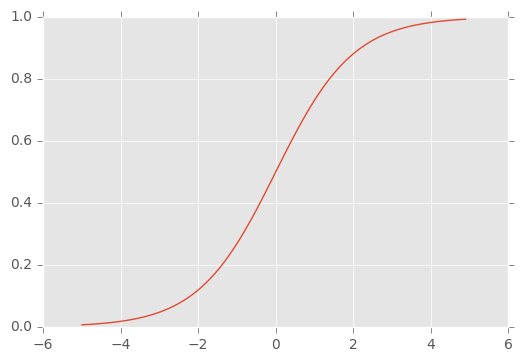

In [251]:
from scipy.special import expit 
sigmoid = expit
x = np.arange(-5, 5, step=.1)
plt.plot(x, sigmoid(x))

# As a test, according to the exercise files, sigmoid(0) should be exactly 0.5. Also,for large positive values of x, 
# the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0

print('sigmoid(0) = {}, sigmoid(10000) = {}, and sigmoid(-10000) = {}'.format(sigmoid(0), 
                                                                              sigmoid(10000), sigmoid(-10000)))

# hypothesis function for logistic regression  
def h(X, theta):
    return sigmoid(X * theta.T)

With that out of the picture, we can implement the cost function $ J(\theta)$ and gradient for logistic regression.

In [252]:
def cost(theta, X, y):
    # Initialize some useful values
    m = y.size  
#     temp = np.multiply(-y.T, np.log(h(X, theta))) - np.multiply(1-y, np.log(1- h(X, theta)))
    temp = -y.T * np.log(h(X, theta)) - (1-y.T) * np.log(1- h(X, theta))
#     print('shape of temp', temp.shape)
#     print('shape of h(X, theta)', h(X, theta).shape)
    
    return (temp / m) [0, 0]

In [253]:
# Constructing X and assigning values 
data.insert(0, 'One', 1)
X = data.iloc[:, 0: data.shape[1]-1]
X = np.matrix(X)
# print('shape of X = ', X.shape)
y = data.iloc[:, data.shape[1]-1:data.shape[1]]
print('shape of y = ', y.shape)
y = np.matrix(y)

print('shape of matrix y = ', y.shape)
theta = np.zeros(3) 
print('shape of array theta = ', theta.shape)

theta = np.matrix(theta)
print('shape of matrix theta = ', theta.shape)

# When converting from numpy array to matrix, a (3,) array becomes a 1 x 3 matrix. This is why when multiplying X and 
# theta in the definition of the hypothesis fucntion, we had to write X * theta.T rather than X * theta as stated in the
# original formula

shape of y =  (100, 1)
shape of matrix y =  (100, 1)
shape of array theta =  (3,)
shape of matrix theta =  (1, 3)


In [254]:
# With zero-initialized theta parameters, we are expected to get a cost of around 0.693
cost(theta, X, y)  

0.69314718055994529

In [255]:
def gradientDecent(theta, X, y, alpha):
    error = h(X, theta) -y
    k = theta - ((alpha/len(X)) * X.T * (error)).T
    temp= (alpha/len(X)) * X.T * (error)

    return k

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return theta - 0.0005*grad

In [256]:
alpha = 0.0005

for i in range(50):
    print(cost(theta, X, y))  
    thetaOn = gradient(theta, X, y)
    
    theta = gradientDecent(theta, X, y,alpha)


0.69314718056
0.6320080158
0.631522937638
0.631385153851
0.631258459905
0.631141611671
0.631033827779
0.63093438901
0.630842633172
0.630757950607
0.630679780044
0.63060760478
0.630540949148
0.630479375272
0.630422480067
0.630369892476
0.630321270931
0.630276301007
0.630234693265
0.630196181261
0.630160519723
0.630127482861
0.630096862819
0.630068468246
0.630042122983
0.630017664855
0.629994944556
0.629973824626
0.629954178509
0.629935889684
0.629918850869
0.629902963282
0.62988813597
0.629874285187
0.629861333815
0.629849210844
0.629837850885
0.629827193721
0.629817183901
0.62980777036
0.629798906067
0.629790547713
0.62978265541
0.62977519242
0.629768124909
0.629761421715
0.629755054135
0.629748995733
0.629743222159
0.629737710984
